In [1]:
import ruclip
import numpy as np
from pathlib import Path
import zipfile

device = 'cpu'
clip, processor = ruclip.load('ruclip-vit-base-patch32-384', device=device)

8it [00:02,  3.87it/s]


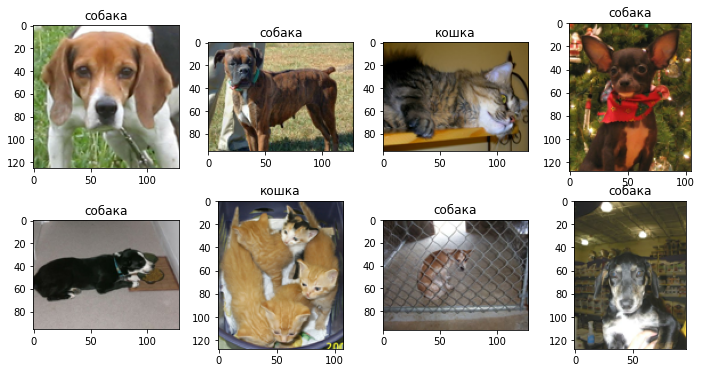

In [2]:
import torch
import base64
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# prepare images
bs4_urls = requests.get('https://raw.githubusercontent.com/sberbank-ai/ru-dolph/master/pics/pipelines/cats_vs_dogs_bs4.json').json()
images = [Image.open(BytesIO(base64.b64decode(bs4_url))) for bs4_url in bs4_urls]

# prepare classes
classes = ['кошка', 'собака']
templates = ['{}', 'это {}', 'на картинке {}', 'это {}, домашнее животное']

# predict
predictor = ruclip.Predictor(clip, processor, device, bs=8, templates=templates)
with torch.no_grad():
    text_latents = predictor.get_text_latents(classes)
    pred_labels = predictor.run(images, text_latents)

# show results
f, ax = plt.subplots(2,4, figsize=(12,6))
for i, (pil_img, pred_label) in enumerate(zip(images, pred_labels)):
    ax[i//4, i%4].imshow(pil_img)
    ax[i//4, i%4].set_title(classes[pred_label])

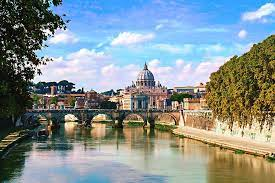

In [5]:
img_test_1 = Image.open("Rome Weather/Snowy/download (10).jpg")
img_test_2 = Image.open("Rome Weather/Sunny/download.jpg")
img_test_2

In [6]:
text_emb = predictor.get_text_latents(["Зимний город"])
img_emb = predictor.get_image_latents([img_test_1, img_test_2])

2it [00:00,  5.14it/s]


In [7]:
torch.matmul(text_emb, img_emb.t())

tensor([[0.3015, 0.1749]], grad_fn=<MmBackward0>)

In [10]:
with zipfile.ZipFile("fastapi_docker/rome_views.zip", 'r') as zip_ref:
    zip_ref.extractall("fastapi_docker/")

In [10]:
img_path = Path("fastapi_docker/Rome Weather/")
img_list = list(img_path.rglob("*/*.jpg"))

In [24]:
img_latents = predictor.get_image_latents([Image.open(img_name) for img_name in img_list])


0it [00:00, ?it/s]
8it [00:01,  5.55it/s]
16it [00:02,  5.44it/s]
24it [00:04,  5.43it/s]
32it [00:05,  5.39it/s]
40it [00:07,  5.22it/s]
48it [00:09,  5.19it/s]
56it [00:13,  3.29it/s]
64it [00:21,  1.87it/s]
72it [00:25,  1.87it/s]
80it [00:29,  1.90it/s]
88it [00:35,  1.73it/s]
96it [00:56,  1.20s/it]
104it [01:12,  1.43s/it]
112it [01:26,  1.54s/it]
120it [01:33,  1.34s/it]
128it [01:56,  1.82s/it]
136it [02:07,  1.67s/it]
144it [02:30,  2.03s/it]
152it [02:50,  2.17s/it]
160it [03:00,  1.88s/it]
168it [03:27,  2.35s/it]
176it [03:39,  2.08s/it]
184it [04:00,  2.25s/it]
192it [04:10,  1.94s/it]
200it [04:45,  2.68s/it]
208it [05:02,  2.47s/it]
216it [05:20,  2.24s/it]
224it [05:27,  2.03s/it]
232it [05:55,  2.49s/it]
240it [06:13,  2.42s/it]
248it [06:28,  2.24s/it]
250it [06:32,  1.57s/it]


In [ ]:
img_latents.cpu().detach().numpy().shape

(250, 512)

In [62]:
text_emb = predictor.get_text_latents(["Пантеон в дождливую погоду"])
similarity = torch.matmul(text_emb, img_latents.t()).cpu().detach().numpy()

In [63]:
np.argpartition(similarity[0], -8)[-8:]

array([ 95,  43, 151, 115, 145, 100,  49, 142], dtype=int64)

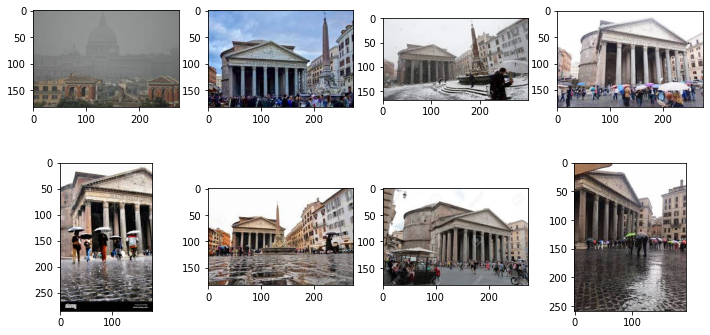

In [64]:
f, ax = plt.subplots(2,4, figsize=(12,6))
for i, num in enumerate(np.argpartition(similarity[0], -8)[-8:]):
    ax[i//4, i%4].imshow(Image.open(img_list[num]))
    #ax[i//4, i%4].set_title(classes[pred_label])

In [3]:
import random

In [17]:
with zipfile.ZipFile("fastapi_docker/sport.zip", 'r') as zip_ref:
    zip_ref.extractall("fastapi_docker/sports")

In [18]:
img_path = Path("fastapi_docker/sports/")
img_list = list(img_path.rglob("*/*.jpg"))
img_latents = predictor.get_image_latents([Image.open(img_name) for img_name in img_list])


0it [00:00, ?it/s]
8it [00:01,  4.34it/s]
16it [00:03,  4.56it/s]
24it [00:05,  4.69it/s]
32it [00:06,  4.60it/s]
40it [00:08,  4.72it/s]
48it [00:10,  4.69it/s]
56it [00:12,  4.61it/s]
64it [00:13,  4.55it/s]
72it [00:15,  4.42it/s]
80it [00:19,  3.36it/s]
88it [00:35,  1.34it/s]
96it [00:44,  1.09it/s]
100it [00:56,  1.77it/s]


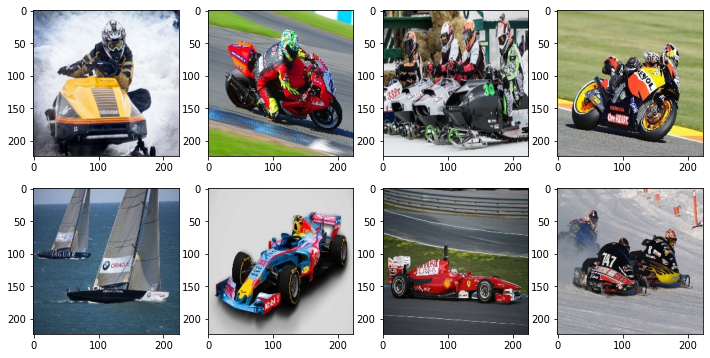

In [22]:
text_emb = predictor.get_text_latents(["гонки на машинах"])
similarity = torch.matmul(text_emb, img_latents.t()).cpu().detach().numpy()

f, ax = plt.subplots(2,4, figsize=(12,6))
for i, num in enumerate(np.argpartition(similarity[0], -8)[-8:]):
    ax[i//4, i%4].imshow(Image.open(img_list[num]))
    #ax[i//4, i%4].set_title(classes[pred_label])

In [23]:
with zipfile.ZipFile("fastapi_docker/ships.zip", 'r') as zip_ref:
    zip_ref.extractall("fastapi_docker/ships")

In [24]:
img_path = Path("fastapi_docker/ships/")
img_list = list(img_path.rglob("*/*.jpg"))
img_latents = predictor.get_image_latents([Image.open(img_name) for img_name in img_list])

100it [01:01,  1.62it/s]


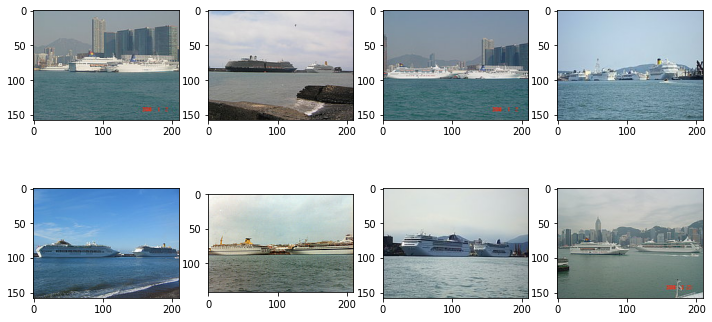

In [29]:
text_emb = predictor.get_text_latents(["Паром"])
similarity = torch.matmul(text_emb, img_latents.t()).cpu().detach().numpy()

f, ax = plt.subplots(2,4, figsize=(12,6))
for i, num in enumerate(np.argpartition(similarity[0], -8)[-8:]):
    ax[i//4, i%4].imshow(Image.open(img_list[num]))
    #ax[i//4, i%4].set_title(classes[pred_label])

In [87]:
import os
import shutil
import shortuuid

img_for_search_path = Path("./imgs_for_search/")
os.mkdir(img_for_search_path)

In [52]:
img_paths = [Path("fastapi_docker/ships/"), Path("fastapi_docker/sports/"), Path("fastapi_docker/Rome Weather/")]
for path in img_paths:
    img_list = list(path.rglob("*/*.jpg"))
    random.shuffle(img_list)
    for file in img_list:
        shutil.copyfile(file, img_for_search_path/(shortuuid.uuid()+".jpg"))

In [54]:
shutil.make_archive("search_imgs", 'zip', "./imgs_for_search")

'C:\\Users\\roman\\Workplace\\semantic-search-experiments\\search_imgs.zip'